In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
BBB = pd.read_csv("BBB_Train.csv", index_col = 0)
DDD = pd.read_csv("DDD_Train.csv", index_col = 0)
FFF = pd.read_csv("FFF_Train.csv", index_col = 0)

C:\Users\Chris\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:522: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
BBB

,code_module,code_presentation,id_student,identifier,date,sum_click,asgmts,csum_asgmts,Avg_score,final_result
31138,BBB,2013B,23629,BBB 2013B 23629,-23,0,0,0,0.0,Fail
31139,BBB,2013B,23629,BBB 2013B 23629,-22,0,0,0,0.0,Fail
31140,BBB,2013B,23629,BBB 2013B 23629,-21,0,0,0,0.0,Fail
31141,BBB,2013B,23629,BBB 2013B 23629,-20,0,0,0,0.0,Fail
31142,BBB,2013B,23629,BBB 2013B 23629,-19,0,0,0,0.0,Fail
31143,BBB,2013B,23629,BBB 2013B 23629,-18,0,0,0,0.0,Fail
31144,BBB,2013B,23629,BBB 2013B 23629,-17,0,0,0,0.0,Fail
31145,BBB,2013B,23629,BBB 2013B 23629,-16,0,0,0,0.0,Fail
31146,BBB,2013B,23629,BBB 2013B 23629,-15,0,0,0,0.0,Fail
31147,BBB,2013B,23629,BBB 2013B 23629,-14,0,0,0,0.0,Fail


In [4]:
# delete variable presenting the number of assignments made each day as we have the cumulative sum
BBB = BBB.drop(["asgmts"], axis = 1)
DDD = DDD.drop(["asgmts"], axis = 1)
FFF = FFF.drop(["asgmts"], axis = 1)

For computational purposes we want the values of the features to lie between 0 and 1.
Therefore, we :
1. Divide the average score column by 100 (since 100 is the max score)
2. Divide the cumulative sum of assignments submitted column by the total number of assignments in the corresponding course presentation
3. Later on we normalize the number of daily clicks feature as well

In [5]:
# Divide the average score column by 100 (since 100 is the max score)
BBB["Avg_score"][BBB["csum_asgmts"] != -1] = BBB["Avg_score"][BBB["csum_asgmts"] != -1]/100 
DDD["Avg_score"][DDD["csum_asgmts"] != -1] = DDD["Avg_score"][DDD["csum_asgmts"] != -1]/100 
FFF["Avg_score"][FFF["csum_asgmts"] != -1] = FFF["Avg_score"][FFF["csum_asgmts"] != -1]/100 

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [6]:
# Divide the cumulative sum of assignments submitted column by the total number of assignments in the corresponding course presentation
Courses = ["BBB", "DDD", "FFF"]
Presentations = ["2013B", "2013J", "2014B", "2014J"]

# Order: 2013B, 2013J, 2014B, 2014J
total_asgmts_BBB = list(BBB.groupby(by = "code_presentation").csum_asgmts.max())
total_asgmts_DDD = list(DDD.groupby(by = "code_presentation").csum_asgmts.max())
total_asgmts_FFF = list(FFF.groupby(by = "code_presentation").csum_asgmts.max())

for i in range(len(Presentations)):
    BBB["csum_asgmts"][(BBB["code_presentation"]==Presentations[i]) & (BBB["csum_asgmts"] != -1)] = BBB["csum_asgmts"]/total_asgmts_BBB[i]
    DDD["csum_asgmts"][(DDD["code_presentation"]==Presentations[i]) & (DDD["csum_asgmts"] != -1)] = DDD["csum_asgmts"]/total_asgmts_DDD[i]
    FFF["csum_asgmts"][(FFF["code_presentation"]==Presentations[i]) & (FFF["csum_asgmts"] != -1)] = FFF["csum_asgmts"]/total_asgmts_FFF[i]

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [7]:
# Split the datasets in train and test sets (2014J = test set, while 2013B, 2013J and 2014B comprise the training set)
BBB_Test = BBB[BBB["code_presentation"] == "2014J"]
DDD_Test = DDD[DDD["code_presentation"] == "2014J"]
FFF_Test = FFF[FFF["code_presentation"] == "2014J"]

BBB_Train = BBB[BBB["code_presentation"] != "2014J"]
DDD_Train = DDD[DDD["code_presentation"] != "2014J"]
FFF_Train = FFF[FFF["code_presentation"] != "2014J"]

In [8]:
# sort by identifier and date
BBB_Train = BBB_Train.sort_values(by = ['identifier','date'])
DDD_Train = DDD_Train.sort_values(by = ['identifier','date'])
FFF_Train = FFF_Train.sort_values(by = ['identifier','date'])

BBB_Test = BBB_Test.sort_values(by = ['identifier','date'])
DDD_Test = DDD_Test.sort_values(by = ['identifier','date'])
FFF_Test = FFF_Test.sort_values(by = ['identifier','date'])

In [9]:
BBB_Train.head()

,code_module,code_presentation,id_student,identifier,date,sum_click,csum_asgmts,Avg_score,final_result
1,BBB,2013B,1008675,BBB 2013B 1008675,-23,0,0.0,0.0,Pass
2,BBB,2013B,1008675,BBB 2013B 1008675,-22,0,0.0,0.0,Pass
3,BBB,2013B,1008675,BBB 2013B 1008675,-21,0,0.0,0.0,Pass
4,BBB,2013B,1008675,BBB 2013B 1008675,-20,0,0.0,0.0,Pass
5,BBB,2013B,1008675,BBB 2013B 1008675,-19,0,0.0,0.0,Pass


In [10]:
# Make new datasets with only the relevant variables
BBB_LSTM_Train = BBB_Train.loc[:,["code_presentation","identifier","date","sum_click", "csum_asgmts", "Avg_score", "final_result"]]
BBB_LSTM_Test = BBB_Test.loc[:,["code_presentation","identifier","date","sum_click", "csum_asgmts", "Avg_score", "final_result"]]

DDD_LSTM_Train = DDD_Train.loc[:,["code_presentation","identifier","date","sum_click", "csum_asgmts", "Avg_score", "final_result"]]
DDD_LSTM_Test = DDD_Test.loc[:,["code_presentation","identifier","date","sum_click", "csum_asgmts", "Avg_score", "final_result"]]

FFF_LSTM_Train = FFF_Train.loc[:,["code_presentation","identifier","date","sum_click", "csum_asgmts", "Avg_score", "final_result"]]
FFF_LSTM_Test = FFF_Test.loc[:,["code_presentation","identifier","date","sum_click", "csum_asgmts", "Avg_score", "final_result"]]

In [11]:
BBB_LSTM_Train.head()

,code_presentation,identifier,date,sum_click,csum_asgmts,Avg_score,final_result
1,2013B,BBB 2013B 1008675,-23,0,0.0,0.0,Pass
2,2013B,BBB 2013B 1008675,-22,0,0.0,0.0,Pass
3,2013B,BBB 2013B 1008675,-21,0,0.0,0.0,Pass
4,2013B,BBB 2013B 1008675,-20,0,0.0,0.0,Pass
5,2013B,BBB 2013B 1008675,-19,0,0.0,0.0,Pass


In [12]:
BBB_LSTM_Train.shape

(1122969, 7)

In [13]:
BBB_LSTM_Train.loc[:,["sum_click","asgmts","Avg_score"]][BBB_LSTM_Train["sum_click"]!=-1].shape

C:\Users\Chris\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


(1047040, 3)

In [14]:
# CLICKS DISTRIBUTIONS

(array([9.60531e+05, 4.61300e+04, 1.95360e+04, 9.69100e+03, 4.52100e+03,
        2.38000e+03, 1.53800e+03, 8.60000e+02, 5.98000e+02, 3.96000e+02,
        2.54000e+02, 1.64000e+02, 1.35000e+02, 9.70000e+01, 4.20000e+01,
        3.40000e+01, 3.30000e+01, 1.80000e+01, 1.80000e+01, 1.20000e+01,
        5.00000e+00, 6.00000e+00, 7.00000e+00, 3.00000e+00, 4.00000e+00,
        5.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 3.00000e+00, 1.00000e+00, 3.00000e+00, 0.00000e+00,
        1.00000e+00, 4.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

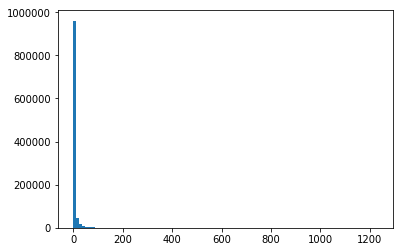

In [15]:
plt.hist(BBB_Train["sum_click"][BBB_Train["sum_click"]!= -1], bins= 100)

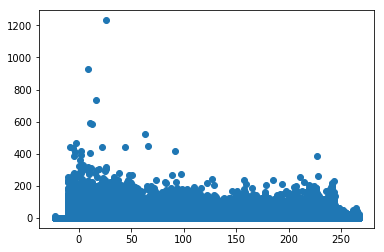

In [16]:
plt.scatter(x=BBB_Train["date"][BBB_Train["sum_click"]!= -1], y=BBB_Train["sum_click"][BBB_Train["sum_click"]!= -1])

(array([4.12832e+05, 1.10610e+04, 3.72600e+03, 1.50800e+03, 6.33000e+02,
        3.06000e+02, 1.58000e+02, 6.90000e+01, 5.40000e+01, 3.70000e+01,
        3.40000e+01, 1.50000e+01, 1.30000e+01, 1.30000e+01, 7.00000e+00,
        7.00000e+00, 1.00000e+00, 4.00000e+00, 2.00000e+00, 5.00000e+00,
        0.00000e+00, 3.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

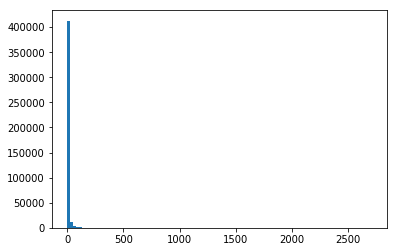

In [17]:
plt.hist(BBB_Test["sum_click"][BBB_Test["sum_click"]!= -1], bins= 100)

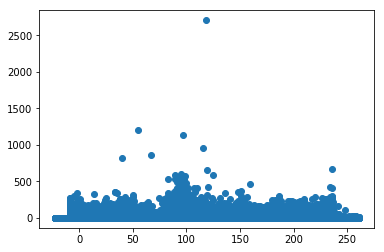

In [18]:
plt.scatter(x=BBB_Test["date"][BBB_Test["sum_click"]!= -1], y=BBB_Test["sum_click"][BBB_Test["sum_click"]!= -1])

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
scaler.fit(np.log((BBB_Train["sum_click"][BBB_Train["sum_click"]!= -1]) + 1).values.reshape(-1,1))
BBB_LSTM_Train["sum_click"][BBB_LSTM_Train["sum_click"] != -1] = scaler.transform(np.log((BBB_Train["sum_click"][BBB_Train["sum_click"]!= -1]) + 1).values.reshape(-1,1))
BBB_LSTM_Test["sum_click"][BBB_LSTM_Test["sum_click"] != -1] = scaler.transform(np.log((BBB_Test["sum_click"][BBB_Test["sum_click"]!= -1]) + 1).values.reshape(-1,1))

scaler.fit(np.log((DDD_Train["sum_click"][DDD_Train["sum_click"]!= -1]) + 1).values.reshape(-1,1))
DDD_LSTM_Train["sum_click"][DDD_LSTM_Train["sum_click"] != -1] = scaler.transform(np.log((DDD_Train["sum_click"][DDD_Train["sum_click"]!= -1]) + 1).values.reshape(-1,1))
DDD_LSTM_Test["sum_click"][DDD_LSTM_Test["sum_click"] != -1] = scaler.transform(np.log((DDD_Test["sum_click"][DDD_Test["sum_click"]!= -1]) + 1).values.reshape(-1,1))

scaler.fit(np.log((FFF_Train["sum_click"][FFF_Train["sum_click"]!= -1]) + 1).values.reshape(-1,1))
FFF_LSTM_Train["sum_click"][FFF_LSTM_Train["sum_click"] != -1] = scaler.transform(np.log((FFF_Train["sum_click"][FFF_Train["sum_click"]!= -1]) + 1).values.reshape(-1,1))
FFF_LSTM_Test["sum_click"][FFF_LSTM_Test["sum_click"] != -1] = scaler.transform(np.log((FFF_Test["sum_click"][FFF_Test["sum_click"]!= -1]) + 1).values.reshape(-1,1))

C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:7

In [25]:
(BBB_Test["sum_click"][BBB_Test["sum_click"]!= -1]).max()

2709

In [23]:
BBB_LSTM_Train

,code_presentation,identifier,date,sum_click,csum_asgmts,Avg_score,final_result
1,2013B,BBB 2013B 1008675,-23,0.000000,0.0,0.0,Pass
2,2013B,BBB 2013B 1008675,-22,0.000000,0.0,0.0,Pass
3,2013B,BBB 2013B 1008675,-21,0.000000,0.0,0.0,Pass
4,2013B,BBB 2013B 1008675,-20,0.000000,0.0,0.0,Pass
5,2013B,BBB 2013B 1008675,-19,0.000000,0.0,0.0,Pass
6,2013B,BBB 2013B 1008675,-18,0.000000,0.0,0.0,Pass
7,2013B,BBB 2013B 1008675,-17,0.000000,0.0,0.0,Pass
8,2013B,BBB 2013B 1008675,-16,0.000000,0.0,0.0,Pass
9,2013B,BBB 2013B 1008675,-15,0.000000,0.0,0.0,Pass
10,2013B,BBB 2013B 1008675,-14,0.000000,0.0,0.0,Pass


Save the datasets as csv in order to prepare them for the traditional machine learning algorithms

In [24]:
BBB_LSTM_Train.to_csv("BBB_Train_df.csv")
BBB_LSTM_Test.to_csv("BBB_Test_df.csv")
DDD_LSTM_Train.to_csv("DDD_Train_df.csv")
DDD_LSTM_Test.to_csv("DDD_Test_df.csv")
FFF_LSTM_Train.to_csv("FFF_Train_df.csv")
FFF_LSTM_Test.to_csv("FFF_Test_df.csv")

Make a separate array for the target variabe (final_result)

In [25]:
BBB_Target_Train = pd.concat((BBB_Train.loc[:,"identifier"],BBB_Train.loc[:,"final_result"]), axis = 1).drop_duplicates()
BBB_Target_Test = pd.concat((BBB_Test.loc[:,"identifier"],BBB_Test.loc[:,"final_result"]), axis = 1).drop_duplicates()

DDD_Target_Train = pd.concat((DDD_Train.loc[:,"identifier"],DDD_Train.loc[:,"final_result"]), axis = 1).drop_duplicates()
DDD_Target_Test = pd.concat((DDD_Test.loc[:,"identifier"],DDD_Test.loc[:,"final_result"]), axis = 1).drop_duplicates()

FFF_Target_Train = pd.concat((FFF_Train.loc[:,"identifier"],FFF_Train.loc[:,"final_result"]), axis = 1).drop_duplicates()
FFF_Target_Test = pd.concat((FFF_Test.loc[:,"identifier"],FFF_Test.loc[:,"final_result"]), axis = 1).drop_duplicates()

In [26]:
BBB_Target_Train

,identifier,final_result
1,BBB 2013B 1008675,Pass
292,BBB 2013B 104054,Distinction
583,BBB 2013B 108377,Pass
874,BBB 2013B 108589,Pass
1165,BBB 2013B 1098728,Fail
1456,BBB 2013B 109938,Distinction
1747,BBB 2013B 110881,Pass
2038,BBB 2013B 116603,Distinction
2329,BBB 2013B 117071,Fail
2620,BBB 2013B 120994,Fail


In [27]:
BBB_Train_Targets_1D = np.array(BBB_Target_Train.iloc[:,-1])
DDD_Train_Targets_1D = np.array(DDD_Target_Train.iloc[:,-1])
FFF_Train_Targets_1D = np.array(FFF_Target_Train.iloc[:,-1])

BBB_Test_Targets_1D = np.array(BBB_Target_Test.iloc[:,-1])
DDD_Test_Targets_1D = np.array(DDD_Target_Test.iloc[:,-1])
FFF_Test_Targets_1D = np.array(FFF_Target_Test.iloc[:,-1])

In [28]:
# Relabel the target classes
BBB_Train_Targets_1D[BBB_Train_Targets_1D == "Fail"] = int(0)
BBB_Train_Targets_1D[BBB_Train_Targets_1D == "Pass"] = int(1)
BBB_Train_Targets_1D[BBB_Train_Targets_1D == "Distinction"] = int(1)

DDD_Train_Targets_1D[DDD_Train_Targets_1D == "Fail"] = int(0)
DDD_Train_Targets_1D[DDD_Train_Targets_1D == "Pass"] = int(1)
DDD_Train_Targets_1D[DDD_Train_Targets_1D == "Distinction"] = int(1)

FFF_Train_Targets_1D[FFF_Train_Targets_1D == "Fail"] = int(0)
FFF_Train_Targets_1D[FFF_Train_Targets_1D == "Pass"] = int(1)
FFF_Train_Targets_1D[FFF_Train_Targets_1D == "Distinction"] = int(1)

BBB_Test_Targets_1D[BBB_Test_Targets_1D == "Fail"] = int(0)
BBB_Test_Targets_1D[BBB_Test_Targets_1D == "Pass"] = int(1)
BBB_Test_Targets_1D[BBB_Test_Targets_1D == "Distinction"] = int(1)

DDD_Test_Targets_1D[DDD_Test_Targets_1D == "Fail"] = int(0)
DDD_Test_Targets_1D[DDD_Test_Targets_1D == "Pass"] = int(1)
DDD_Test_Targets_1D[DDD_Test_Targets_1D == "Distinction"] = int(1)

FFF_Test_Targets_1D[FFF_Test_Targets_1D == "Fail"] = int(0)
FFF_Test_Targets_1D[FFF_Test_Targets_1D == "Pass"] = int(1)
FFF_Test_Targets_1D[FFF_Test_Targets_1D == "Distinction"] = int(1)

Create 3D arrays with the dimensions representing [samples, sequences, features] = [students, days, (clicks/asgmts/avg_score)]

In [29]:
BBB_LSTM_Train_3D = np.asarray(list(BBB_LSTM_Train.groupby('identifier').apply(pd.DataFrame.as_matrix))) 
BBB_LSTM_Test_3D = np.asarray(list(BBB_LSTM_Test.groupby('identifier').apply(pd.DataFrame.as_matrix)))

DDD_LSTM_Train_3D = np.asarray(list(DDD_LSTM_Train.groupby('identifier').apply(pd.DataFrame.as_matrix))) 
DDD_LSTM_Test_3D = np.asarray(list(DDD_LSTM_Test.groupby('identifier').apply(pd.DataFrame.as_matrix)))

FFF_LSTM_Train_3D = np.asarray(list(FFF_LSTM_Train.groupby('identifier').apply(pd.DataFrame.as_matrix))) 
FFF_LSTM_Test_3D = np.asarray(list(FFF_LSTM_Test.groupby('identifier').apply(pd.DataFrame.as_matrix)))

C:\Users\Chris\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:5088: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  starts, ends)


In [30]:
BBB_LSTM_Train_3D

array([[['2013B', 'BBB 2013B 1008675', -23, ..., 0.0, 0.0, 'Pass'],
        ['2013B', 'BBB 2013B 1008675', -22, ..., 0.0, 0.0, 'Pass'],
        ['2013B', 'BBB 2013B 1008675', -21, ..., 0.0, 0.0, 'Pass'],
        ...,
        ['2013B', 'BBB 2013B 1008675', 265, ..., -1.0, -1.0, 'Pass'],
        ['2013B', 'BBB 2013B 1008675', 266, ..., -1.0, -1.0, 'Pass'],
        ['2013B', 'BBB 2013B 1008675', 267, ..., -1.0, -1.0, 'Pass']],

       [['2013B', 'BBB 2013B 104054', -23, ..., -1.0, -1.0,
         'Distinction'],
        ['2013B', 'BBB 2013B 104054', -22, ..., -1.0, -1.0,
         'Distinction'],
        ['2013B', 'BBB 2013B 104054', -21, ..., -1.0, -1.0,
         'Distinction'],
        ...,
        ['2013B', 'BBB 2013B 104054', 265, ..., -1.0, -1.0,
         'Distinction'],
        ['2013B', 'BBB 2013B 104054', 266, ..., -1.0, -1.0,
         'Distinction'],
        ['2013B', 'BBB 2013B 104054', 267, ..., -1.0, -1.0,
         'Distinction']],

       [['2013B', 'BBB 2013B 108377', -23, ...

In [31]:
# Remove all unnecessary features, only the clicks, asgmts and avg score are necessary
BBB_Train_3D = np.delete(BBB_LSTM_Train_3D,[0,1,2,6],axis=2)
BBB_Test_3D = np.delete(BBB_LSTM_Test_3D,[0,1,2,6],axis=2)

DDD_Train_3D = np.delete(DDD_LSTM_Train_3D,[0,1,2,6],axis=2)
DDD_Test_3D = np.delete(DDD_LSTM_Test_3D,[0,1,2,6],axis=2)

FFF_Train_3D = np.delete(FFF_LSTM_Train_3D,[0,1,2,6],axis=2)
FFF_Test_3D = np.delete(FFF_LSTM_Test_3D,[0,1,2,6],axis=2)

In [32]:
BBB_Train_3D

array([[[0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        ...,
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0]],

       [[-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0],
        ...,
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0]],

       [[0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        ...,
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0]],

       ...,

       [[0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        ...,
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0]],

       [[0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        ...,
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0],
        [-1.0, -1.0, -1.0]],

       [[0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0],
        ...,
        [-1.0, -1.0,

In [33]:
print(BBB_Train_Targets_1D.shape)
print(BBB_Train_3D.shape)

(3859,)
(3859, 291, 3)


In [34]:
# Take the maximum number of days a student made use of the VLE before the course started
Precourse_days_BBB = abs(BBB_Train["date"].min())
Precourse_days_DDD = abs(DDD_Train["date"].min())
Precourse_days_FFF = abs(FFF_Train["date"].min())

# Compute the cut-off dates for the deciles required to separate the course duration in 10 "equal" timesteps at which the models can perform predictions
cut_off_BBB = int(round((BBB_Train_3D.shape[1] - Precourse_days_BBB)/10))
cut_off_DDD = int(round((DDD_Train_3D.shape[1] - Precourse_days_DDD)/10))
cut_off_FFF = int(round((FFF_Train_3D.shape[1] - Precourse_days_FFF)/10))



In [35]:
# Create the datasets corresponding the each decile for the respective course
BBB_Train_Decile0 = BBB_Train_3D[:,0:Precourse_days_BBB,:]
BBB_Train_Decile1 = BBB_Train_3D[:,0:(Precourse_days_BBB+cut_off_BBB),:]
BBB_Train_Decile2 = BBB_Train_3D[:,0:(Precourse_days_BBB+cut_off_BBB*2),:]
BBB_Train_Decile3 = BBB_Train_3D[:,0:(Precourse_days_BBB+cut_off_BBB*3),:]
BBB_Train_Decile4 = BBB_Train_3D[:,0:(Precourse_days_BBB+cut_off_BBB*4),:]
BBB_Train_Decile5 = BBB_Train_3D[:,0:(Precourse_days_BBB+cut_off_BBB*5),:]
BBB_Train_Decile6 = BBB_Train_3D[:,0:(Precourse_days_BBB+cut_off_BBB*6),:]
BBB_Train_Decile7 = BBB_Train_3D[:,0:(Precourse_days_BBB+cut_off_BBB*7),:]
BBB_Train_Decile8 = BBB_Train_3D[:,0:(Precourse_days_BBB+cut_off_BBB*8),:]
BBB_Train_Decile9 = BBB_Train_3D[:,0:(Precourse_days_BBB+cut_off_BBB*9),:]
BBB_Train_Decile10 = BBB_Train_3D

BBB_Test_Decile0 = BBB_Test_3D[:,0:Precourse_days_BBB,:]
BBB_Test_Decile1 = BBB_Test_3D[:,0:(Precourse_days_BBB+cut_off_BBB),:]
BBB_Test_Decile2 = BBB_Test_3D[:,0:(Precourse_days_BBB+cut_off_BBB*2),:]
BBB_Test_Decile3 = BBB_Test_3D[:,0:(Precourse_days_BBB+cut_off_BBB*3),:]
BBB_Test_Decile4 = BBB_Test_3D[:,0:(Precourse_days_BBB+cut_off_BBB*4),:]
BBB_Test_Decile5 = BBB_Test_3D[:,0:(Precourse_days_BBB+cut_off_BBB*5),:]
BBB_Test_Decile6 = BBB_Test_3D[:,0:(Precourse_days_BBB+cut_off_BBB*6),:]
BBB_Test_Decile7 = BBB_Test_3D[:,0:(Precourse_days_BBB+cut_off_BBB*7),:]
BBB_Test_Decile8 = BBB_Test_3D[:,0:(Precourse_days_BBB+cut_off_BBB*8),:]
BBB_Test_Decile9 = BBB_Test_3D[:,0:(Precourse_days_BBB+cut_off_BBB*9),:]
BBB_Test_Decile10 = BBB_Test_3D

In [36]:
DDD_Train_Decile0 = DDD_Train_3D[:,0:Precourse_days_DDD,:]
DDD_Train_Decile1 = DDD_Train_3D[:,0:(Precourse_days_DDD+cut_off_DDD),:]
DDD_Train_Decile2 = DDD_Train_3D[:,0:(Precourse_days_DDD+cut_off_DDD*2),:]
DDD_Train_Decile3 = DDD_Train_3D[:,0:(Precourse_days_DDD+cut_off_DDD*3),:]
DDD_Train_Decile4 = DDD_Train_3D[:,0:(Precourse_days_DDD+cut_off_DDD*4),:]
DDD_Train_Decile5 = DDD_Train_3D[:,0:(Precourse_days_DDD+cut_off_DDD*5),:]
DDD_Train_Decile6 = DDD_Train_3D[:,0:(Precourse_days_DDD+cut_off_DDD*6),:]
DDD_Train_Decile7 = DDD_Train_3D[:,0:(Precourse_days_DDD+cut_off_DDD*7),:]
DDD_Train_Decile8 = DDD_Train_3D[:,0:(Precourse_days_DDD+cut_off_DDD*8),:]
DDD_Train_Decile9 = DDD_Train_3D[:,0:(Precourse_days_DDD+cut_off_DDD*9),:]
DDD_Train_Decile10 = DDD_Train_3D

DDD_Test_Decile0 = DDD_Test_3D[:,0:Precourse_days_DDD,:]
DDD_Test_Decile1 = DDD_Test_3D[:,0:(Precourse_days_DDD+cut_off_DDD),:]
DDD_Test_Decile2 = DDD_Test_3D[:,0:(Precourse_days_DDD+cut_off_DDD*2),:]
DDD_Test_Decile3 = DDD_Test_3D[:,0:(Precourse_days_DDD+cut_off_DDD*3),:]
DDD_Test_Decile4 = DDD_Test_3D[:,0:(Precourse_days_DDD+cut_off_DDD*4),:]
DDD_Test_Decile5 = DDD_Test_3D[:,0:(Precourse_days_DDD+cut_off_DDD*5),:]
DDD_Test_Decile6 = DDD_Test_3D[:,0:(Precourse_days_DDD+cut_off_DDD*6),:]
DDD_Test_Decile7 = DDD_Test_3D[:,0:(Precourse_days_DDD+cut_off_DDD*7),:]
DDD_Test_Decile8 = DDD_Test_3D[:,0:(Precourse_days_DDD+cut_off_DDD*8),:]
DDD_Test_Decile9 = DDD_Test_3D[:,0:(Precourse_days_DDD+cut_off_DDD*9),:]
DDD_Test_Decile10 = DDD_Test_3D

In [37]:
FFF_Train_Decile0 = FFF_Train_3D[:,0:Precourse_days_FFF,:]
FFF_Train_Decile1 = FFF_Train_3D[:,0:(Precourse_days_FFF+cut_off_FFF),:]
FFF_Train_Decile2 = FFF_Train_3D[:,0:(Precourse_days_FFF+cut_off_FFF*2),:]
FFF_Train_Decile3 = FFF_Train_3D[:,0:(Precourse_days_FFF+cut_off_FFF*3),:]
FFF_Train_Decile4 = FFF_Train_3D[:,0:(Precourse_days_FFF+cut_off_FFF*4),:]
FFF_Train_Decile5 = FFF_Train_3D[:,0:(Precourse_days_FFF+cut_off_FFF*5),:]
FFF_Train_Decile6 = FFF_Train_3D[:,0:(Precourse_days_FFF+cut_off_FFF*6),:]
FFF_Train_Decile7 = FFF_Train_3D[:,0:(Precourse_days_FFF+cut_off_FFF*7),:]
FFF_Train_Decile8 = FFF_Train_3D[:,0:(Precourse_days_FFF+cut_off_FFF*8),:]
FFF_Train_Decile9 = FFF_Train_3D[:,0:(Precourse_days_FFF+cut_off_FFF*9),:]
FFF_Train_Decile10 = FFF_Train_3D

FFF_Test_Decile0 = FFF_Test_3D[:,0:Precourse_days_FFF,:]
FFF_Test_Decile1 = FFF_Test_3D[:,0:(Precourse_days_FFF+cut_off_FFF),:]
FFF_Test_Decile2 = FFF_Test_3D[:,0:(Precourse_days_FFF+cut_off_FFF*2),:]
FFF_Test_Decile3 = FFF_Test_3D[:,0:(Precourse_days_FFF+cut_off_FFF*3),:]
FFF_Test_Decile4 = FFF_Test_3D[:,0:(Precourse_days_FFF+cut_off_FFF*4),:]
FFF_Test_Decile5 = FFF_Test_3D[:,0:(Precourse_days_FFF+cut_off_FFF*5),:]
FFF_Test_Decile6 = FFF_Test_3D[:,0:(Precourse_days_FFF+cut_off_FFF*6),:]
FFF_Test_Decile7 = FFF_Test_3D[:,0:(Precourse_days_FFF+cut_off_FFF*7),:]
FFF_Test_Decile8 = FFF_Test_3D[:,0:(Precourse_days_FFF+cut_off_FFF*8),:]
FFF_Test_Decile9 = FFF_Test_3D[:,0:(Precourse_days_FFF+cut_off_FFF*9),:]
FFF_Test_Decile10 = FFF_Test_3D

In [38]:
pd.to_pickle(BBB_Train_Decile0, "BBB_Train_Decile0.pkl")
pd.to_pickle(BBB_Train_Decile1, "BBB_Train_Decile1.pkl")
pd.to_pickle(BBB_Train_Decile2, "BBB_Train_Decile2.pkl")
pd.to_pickle(BBB_Train_Decile3, "BBB_Train_Decile3.pkl")
pd.to_pickle(BBB_Train_Decile4, "BBB_Train_Decile4.pkl")
pd.to_pickle(BBB_Train_Decile5, "BBB_Train_Decile5.pkl")
pd.to_pickle(BBB_Train_Decile6, "BBB_Train_Decile6.pkl")
pd.to_pickle(BBB_Train_Decile7, "BBB_Train_Decile7.pkl")
pd.to_pickle(BBB_Train_Decile8, "BBB_Train_Decile8.pkl")
pd.to_pickle(BBB_Train_Decile9, "BBB_Train_Decile9.pkl")
pd.to_pickle(BBB_Train_Decile10, "BBB_Train_Decile10.pkl")

pd.to_pickle(BBB_Test_Decile0, "BBB_Test_Decile0.pkl")
pd.to_pickle(BBB_Test_Decile1, "BBB_Test_Decile1.pkl")
pd.to_pickle(BBB_Test_Decile2, "BBB_Test_Decile2.pkl")
pd.to_pickle(BBB_Test_Decile3, "BBB_Test_Decile3.pkl")
pd.to_pickle(BBB_Test_Decile4, "BBB_Test_Decile4.pkl")
pd.to_pickle(BBB_Test_Decile5, "BBB_Test_Decile5.pkl")
pd.to_pickle(BBB_Test_Decile6, "BBB_Test_Decile6.pkl")
pd.to_pickle(BBB_Test_Decile7, "BBB_Test_Decile7.pkl")
pd.to_pickle(BBB_Test_Decile8, "BBB_Test_Decile8.pkl")
pd.to_pickle(BBB_Test_Decile9, "BBB_Test_Decile9.pkl")
pd.to_pickle(BBB_Test_Decile10, "BBB_Test_Decile10.pkl")

pd.to_pickle(BBB_Train_Targets_1D, "BBB_Train_Targets_1D.pkl")
pd.to_pickle(BBB_Test_Targets_1D, "BBB_Test_Targets_1D.pkl")

In [39]:
pd.to_pickle(DDD_Train_Decile0, "DDD_Train_Decile0.pkl")
pd.to_pickle(DDD_Train_Decile1, "DDD_Train_Decile1.pkl")
pd.to_pickle(DDD_Train_Decile2, "DDD_Train_Decile2.pkl")
pd.to_pickle(DDD_Train_Decile3, "DDD_Train_Decile3.pkl")
pd.to_pickle(DDD_Train_Decile4, "DDD_Train_Decile4.pkl")
pd.to_pickle(DDD_Train_Decile5, "DDD_Train_Decile5.pkl")
pd.to_pickle(DDD_Train_Decile6, "DDD_Train_Decile6.pkl")
pd.to_pickle(DDD_Train_Decile7, "DDD_Train_Decile7.pkl")
pd.to_pickle(DDD_Train_Decile8, "DDD_Train_Decile8.pkl")
pd.to_pickle(DDD_Train_Decile9, "DDD_Train_Decile9.pkl")
pd.to_pickle(DDD_Train_Decile10, "DDD_Train_Decile10.pkl")

pd.to_pickle(DDD_Test_Decile0, "DDD_Test_Decile0.pkl")
pd.to_pickle(DDD_Test_Decile1, "DDD_Test_Decile1.pkl")
pd.to_pickle(DDD_Test_Decile2, "DDD_Test_Decile2.pkl")
pd.to_pickle(DDD_Test_Decile3, "DDD_Test_Decile3.pkl")
pd.to_pickle(DDD_Test_Decile4, "DDD_Test_Decile4.pkl")
pd.to_pickle(DDD_Test_Decile5, "DDD_Test_Decile5.pkl")
pd.to_pickle(DDD_Test_Decile6, "DDD_Test_Decile6.pkl")
pd.to_pickle(DDD_Test_Decile7, "DDD_Test_Decile7.pkl")
pd.to_pickle(DDD_Test_Decile8, "DDD_Test_Decile8.pkl")
pd.to_pickle(DDD_Test_Decile9, "DDD_Test_Decile9.pkl")
pd.to_pickle(DDD_Test_Decile10, "DDD_Test_Decile10.pkl")

pd.to_pickle(DDD_Train_Targets_1D, "DDD_Train_Targets_1D.pkl")
pd.to_pickle(DDD_Test_Targets_1D, "DDD_Test_Targets_1D.pkl")

In [40]:
pd.to_pickle(FFF_Train_Decile0, "FFF_Train_Decile0.pkl")
pd.to_pickle(FFF_Train_Decile1, "FFF_Train_Decile1.pkl")
pd.to_pickle(FFF_Train_Decile2, "FFF_Train_Decile2.pkl")
pd.to_pickle(FFF_Train_Decile3, "FFF_Train_Decile3.pkl")
pd.to_pickle(FFF_Train_Decile4, "FFF_Train_Decile4.pkl")
pd.to_pickle(FFF_Train_Decile5, "FFF_Train_Decile5.pkl")
pd.to_pickle(FFF_Train_Decile6, "FFF_Train_Decile6.pkl")
pd.to_pickle(FFF_Train_Decile7, "FFF_Train_Decile7.pkl")
pd.to_pickle(FFF_Train_Decile8, "FFF_Train_Decile8.pkl")
pd.to_pickle(FFF_Train_Decile9, "FFF_Train_Decile9.pkl")
pd.to_pickle(FFF_Train_Decile10, "FFF_Train_Decile10.pkl")

pd.to_pickle(FFF_Test_Decile0, "FFF_Test_Decile0.pkl")
pd.to_pickle(FFF_Test_Decile1, "FFF_Test_Decile1.pkl")
pd.to_pickle(FFF_Test_Decile2, "FFF_Test_Decile2.pkl")
pd.to_pickle(FFF_Test_Decile3, "FFF_Test_Decile3.pkl")
pd.to_pickle(FFF_Test_Decile4, "FFF_Test_Decile4.pkl")
pd.to_pickle(FFF_Test_Decile5, "FFF_Test_Decile5.pkl")
pd.to_pickle(FFF_Test_Decile6, "FFF_Test_Decile6.pkl")
pd.to_pickle(FFF_Test_Decile7, "FFF_Test_Decile7.pkl")
pd.to_pickle(FFF_Test_Decile8, "FFF_Test_Decile8.pkl")
pd.to_pickle(FFF_Test_Decile9, "FFF_Test_Decile9.pkl")
pd.to_pickle(FFF_Test_Decile10, "FFF_Test_Decile10.pkl")

pd.to_pickle(FFF_Train_Targets_1D, "FFF_Train_Targets_1D.pkl")
pd.to_pickle(FFF_Test_Targets_1D, "FFF_Test_Targets_1D.pkl")